<ipython-input-4-64d12ef9c962>:18: RuntimeWarning: overflow encountered in exp
  filtered_image = np.exp(filtered_image)
<ipython-input-4-64d12ef9c962>:21: RuntimeWarning: invalid value encountered in true_divide
  filtered_image = (filtered_image - np.min(filtered_image)) / (np.max(filtered_image) - np.min(filtered_image)) * 255


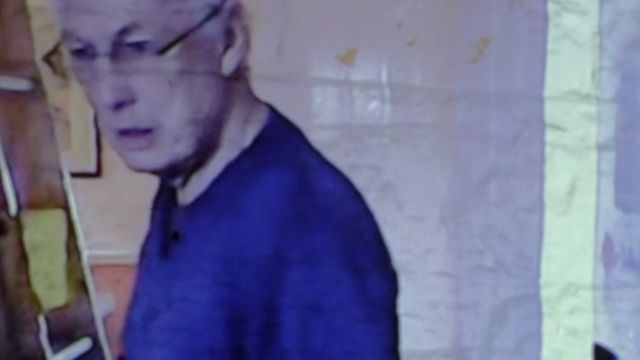

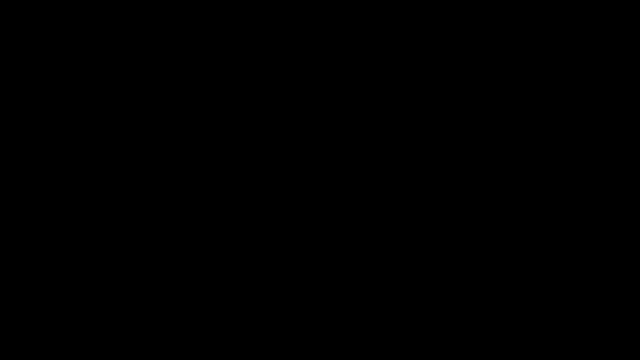

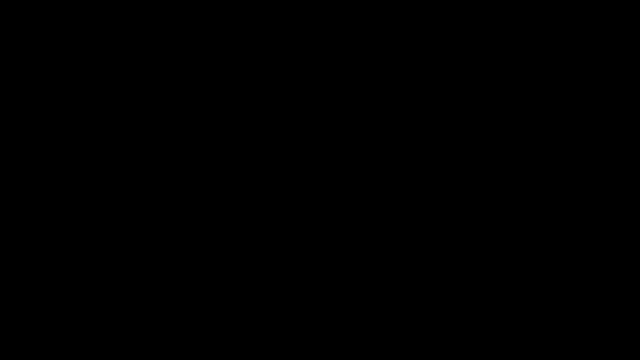

In [4]:
import numpy as np
from PIL import Image

def homomorphic_filter(image, filter_image):
    # Aplicar logaritmo a los píxeles de la imagen de entrada
    log_image = np.log(image)

    # Aplicar la transformada de Fourier a la imagen
    fft = np.fft.fft2(log_image)

    # Aplicar el filtro de homomorfismo
    filtered_fft = np.multiply(fft, filter_image)

    # Aplicar la transformada inversa de Fourier
    filtered_image = np.real(np.fft.ifft2(filtered_fft))

    # Aplicar exponencial a los píxeles de la imagen filtrada
    filtered_image = np.exp(filtered_image)

    # Escalar los valores a un rango de 0 a 255
    filtered_image = (filtered_image - np.min(filtered_image)) / (np.max(filtered_image) - np.min(filtered_image)) * 255

    # Convertir la imagen de vuelta a tipo entero
    filtered_image = filtered_image.astype(np.uint8)

    # Crear una imagen PIL a partir de la matriz filtrada
    filtered_image = Image.fromarray(filtered_image)

    return filtered_image

# Función auxiliar para calcular la transformada de Fourier discreta
def discrete_fourier(image, direction):
    rows, cols = len(image), len(image[0])
    result = [[0.0j] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            sum_val = 0.0j
            for x in range(rows):
                for y in range(cols):
                    angle = direction * 2.0 * math.pi * (float(i * x) / rows + float(j * y) / cols)
                    sum_val += image[x][y] * complex(math.cos(angle), math.sin(angle))
            result[i][j] = sum_val
    return result

def line_detector_filter(image):
    # Convertir la imagen a escala de grises
    gray_image = image.convert("L")

    # Obtener dimensiones de la imagen
    width, height = gray_image.size

    # Crear una imagen vacía del mismo tamaño
    filtered_image = Image.new("L", (width, height))

    # Obtener datos de píxeles de la imagen de entrada
    pixels = gray_image.load()

    # Obtener datos de píxeles de la imagen filtrada
    filtered_pixels = filtered_image.load()

    # Máscara del filtro de detección de líneas
    mask = [[-1, -1, -1],
            [-1,  8, -1],
            [-1, -1, -1]]

    # Aplicar el filtro de detección de líneas
    for y in range(1, height-1):
        for x in range(1, width-1):
            pixel_sum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    pixel_sum += pixels[x+i, y+j] * mask[i+1][j+1]
            pixel_sum = max(0, min(255, pixel_sum))
            filtered_pixels[x, y] = pixel_sum

    return filtered_image


def median_filter(image, size):
    # Convertir la imagen a escala de grises
    gray_image = image.convert("L")

    # Convertir la imagen a matriz numpy
    img_array = np.array(gray_image)

    # Tamaño del filtro
    filter_size = int(size / 2)

    # Crear una matriz para almacenar los píxeles filtrados
    filtered_array = np.zeros_like(img_array)

    # Aplicar el filtro de mediana
    for i in range(filter_size, img_array.shape[0] - filter_size):
        for j in range(filter_size, img_array.shape[1] - filter_size):
            patch = img_array[i - filter_size:i + filter_size + 1, j - filter_size:j + filter_size + 1]
            filtered_array[i, j] = np.median(patch)

    # Crear una imagen PIL a partir de la matriz filtrada
    filtered_image = Image.fromarray(filtered_array)

    return filtered_image

def main():
    # Ruta de la imagen de entrada
    input_image_path = "image.jpg"

    # Cargar la imagen
    input_image = Image.open(input_image_path)

    # Convertir la imagen a escala de grises
    gray_image = input_image.convert("L")

    # Crear una imagen con el mismo tamaño y tipo de la imagen de entrada para el filtro homomórfico
    filter_image = Image.new("L", gray_image.size, 255)

    # Obtener la imagen filtrada con el filtro homomórfico
    filtered_image = homomorphic_filter(gray_image, filter_image)

    # Obtener la imagen filtrada con el filtro de detección de líneas
    line_detected_image = line_detector_filter(filtered_image)

    # Obtener la imagen filtrada con el filtro de mediana (tamaño del filtro = 3)
    median_filtered_image = median_filter(line_detected_image, size=3)

    # Mostrar la imagen original y las imágenes filtradas
    input_image.show()
    line_detected_image.show()
    median_filtered_image.show()

if __name__ == "__main__":
    main()